In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
sys.path.append("src")

from data_preprocessing import load_data

In [40]:
cmap = cm.plasma

In [3]:
data = load_data("data")
data

{'A1': {'0.012':       col.0:ID  col.1:m1ZAMS/Msun  col.2:m2ZAMS/Msun  col.3:m1rem/Msun  \
  0      0_55563            99.9656            74.9932           26.8155   
  1      0_71433            25.6706            25.5763            8.1401   
  2     0_193034            84.6486            70.5671           19.9841   
  3     0_362093            38.1191            36.7541            4.9698   
  4     0_365805            33.9865            32.2683            4.7022   
  ..         ...                ...                ...               ...   
  271  4_3549673            48.2922            48.1464            6.5909   
  272  4_3754308           104.1639            98.4737           17.2679   
  273  4_3868157            36.0922            17.6071           11.5906   
  274  4_3868310            75.7589            68.4414           15.9412   
  275  4_3997582            27.2280            19.5701            8.1426   
  
       col.4:m2rem/Msun  col.5:m1rem+m2rem/Msun  col.6:delay_time/Myr 

In [4]:
data["A1"]["0.0002"]

col.0:ID  col.1:m1ZAMS/Msun  col.2:m2ZAMS/Msun  col.3:m1rem/Msun  \
0            0_26            52.8986            41.9354           21.2200   
1            0_82            62.9081            45.0256           25.5526   
2           0_160            43.2589            30.2719           16.8137   
3           0_214            29.5991            25.4201            8.3773   
4           0_240            45.9534            30.8329           16.7825   
...           ...                ...                ...               ...   
147109  4_1999621           134.5520           129.6824           44.3265   
147110  4_1999663            24.3973            22.0080            5.8064   
147111  4_1999799            62.5326            49.3189           26.4360   
147112  4_1999908            34.5346            21.3237           12.1764   
147113  4_1999924            46.2161            30.3987           15.3320   

        col.4:m2rem/Msun  col.5:m1rem+m2rem/Msun  col.6:delay_time/Myr  \
0                28.8794                 50.0994               16.6680   
1                32.5889                 58.1415               27.5917   
2                21.4028                 38.2165               10.2839   
3                 5.1023                 13.4796              227.4583   
4                23.0931                 39.8756                9.9759   
...                  ...                     ...                   ...   
147109           45.2042                 89.5307             1114.5250   
147110           13.7949                 19.6013               38.5444   
147111           32.8129                 59.2489              135.3389   
147112           15.5364                 27.7128               14.8339   
147113           23.7598                 39.0918                9.5273   

        col.7:sma/Rsun  col.8:ecc  col.9:kick/kms  ...  col.12:cmu2  \
0               6.5975   0.009980          0.0000  ...       1.0000   
1               8.9444   0.014471          0.0000  ...       1.0000   
2               3.7073   0.013083          0.0000  ...       1.0000   
3               5.7546   0.296650         27.7814  ...       0.9996   
4               3.8238   0.012539          0.0000  ...       1.0000   
...                ...        ...             ...  ...          ...   
147109         33.7030   0.102000          0.0000  ...       1.0000   
147110          4.0385   0.037934         40.1337  ...       1.0000   
147111         14.2680   0.015468          0.0000  ...       1.0000   
147112          3.4897   0.018042         11.4561  ...       1.0000   
147113          3.5291   0.012790          0.0000  ...       1.0000   

        col.13:v1x/kms  col.14:v1y/kms  col.15:v1z/kms  col.16:v2x/kms  \
0               0.7088        0.000759          0.0000           5.086   
1               1.1730       -0.000000          0.0000           7.080   
2               1.1240        0.000340          0.0000           8.069   
3              61.8300        6.633000          1.0020         148.500   
4               2.3840        0.000000          0.0000           7.441   
...                ...             ...             ...             ...   
147109          8.1670       -0.000772          0.0000          36.120   
147110          5.8000       -2.249000         -3.6250           9.957   
147111          0.4187        0.027170          0.0000           6.141   
147112          4.0470        2.111000         -0.9472           9.755   
147113          2.6330        0.000000          0.0000           7.290   

        col.17:v2y/kms  col.18:v2z/kms  col.19:time_SN1/Myr  \
0               0.0000           0.000                4.846   
1               0.0000          -0.000                4.455   
2              -0.0000           0.000                5.449   
3              12.5300           9.703                7.269   
4               0.0000           0.000                5.260   
...                ...             ...                  ...   
147109      

alpha: A1
z: 0.0002
z: 0.0004
z: 0.0008
z: 0.0012
z: 0.0016
z: 0.002
z: 0.004
z: 0.006
z: 0.008
z: 0.012
z: 0.016
z: 0.02


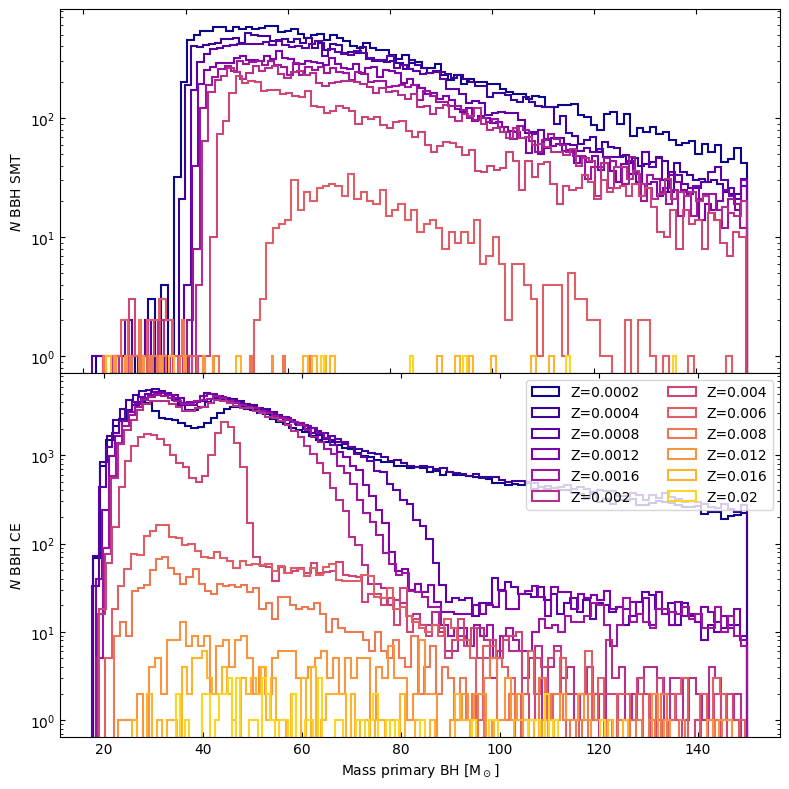

In [43]:
linewidth = 1.5
bins = np.linspace(0, 96, 100)

for alpha,dict_df in data.items():
    print(f"alpha: {alpha}")
    fig = plt.figure(figsize=(8, 8), constrained_layout=False)
    gs  = fig.add_gridspec(nrows=2, wspace=0, hspace=0)
    axes = [fig.add_subplot(gs[i,0]) for i in range(2)]
    
    z_sorted = sorted(dict_df.keys(), key=lambda x: float(x))
    for i,z in enumerate(z_sorted):
        print(f"z: {z}")
        df = dict_df[z]
        
        ax0, ax1 = axes
        color = cmap(i / len(dict_df.values()))
        
        df_smt = df[df["col.21:CE"]==0]
        df_ce = df[df["col.21:CE"]==1]
        
        m_smt = df_smt["col.1:m1ZAMS/Msun"]
        m_ce = df_ce["col.1:m1ZAMS/Msun"]
        
        ax0.hist(m_smt, bins=100, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={z}")
        ax1.hist(m_ce, bins=100, linewidth=linewidth, edgecolor=color, histtype="step", label=f"Z={z}")
        
        for ax in axes:
            ax.set_yscale("log")

        axes[0].tick_params(axis='both', which='both',direction="in",top="on",right="on",labelbottom=False)
        axes[1].tick_params(axis='both', which='both',direction="in",top="on",right="on",labelbottom=True)
        axes[1].legend(ncol=2)

        axes[1].set_xlabel("Mass primary BH [M$_\odot$]")
        axes[0].set_ylabel("$N$ BBH SMT")  
        axes[1].set_ylabel("$N$ BBH CE")
        plt.tight_layout()
    
    plt.show()
    break

In [ ]:
linewidth = 1.5
bins = np.linspace(0, 96, 100)

fig = plt.figure(figsize=(8, 8), constrained_layout=False)
gs  = fig.add_gridspec(nrows=2, wspace=0, hspace=0)
axes = [fig.add_subplot(gs[i,0]) for i in range(2)]

for i,z in enumerate(list_metallicities):
    ax0, ax1 = axes
    color = cmap(i / len(list_metallicities))
    
    dfz = fiducial[fiducial["Z"]==z]
    m0 = np.maximum(dfz["Mass_0"],dfz["Mass_1"])
    m1 = np.minimum(dfz["Mass_0"],dfz["Mass_1"])
    dfz_mergers = fiducial_mergers[fiducial_mergers["Z"]==z]
    m0_mergers = np.maximum(dfz_mergers["Mass_0"],dfz_mergers["Mass_1"])
    m1_mergers = np.minimum(dfz_mergers["Mass_0"],dfz_mergers["Mass_1"])
    
    # [Primary BH Mass]
    # N BBHs
    ax0.hist(m0, bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label="Z="+str(z))
    # N BBHs mergers
    ax1.hist(m0_mergers, bins=bins, linewidth=linewidth, edgecolor=color, histtype="step", label="Z="+str(z))
    
for ax in axes:
    ax.set_yscale("log")
    ax.set_xlim(0,110)
    ax.set_ylim(.5,2e4-1)
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_minor_locator(MultipleLocator(2))

axes[0].tick_params(axis='both', which='both',direction="in",top="on",right="on",labelbottom=False)
axes[1].tick_params(axis='both', which='both',direction="in",top="on",right="on",labelbottom=True)
axes[1].legend(ncol=2)

axes[1].set_xlabel("Massa BH primari [M$_\odot$]",fontsize=label_size)
axes[0].set_ylabel("$N$ BBH",fontsize=label_size)  
axes[1].set_ylabel("$N$ BBH coalescenti",fontsize=label_size)
plt.tight_layout()
fig.savefig("all&mergers_M0.png", dpi=200)